# Modelos de regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuidos segun una N(1.2,2.5)
* Ye = 5 + 1.9*x + e
* e estará distribuido según una N(0, 0.8)

In [223]:
import pandas as pd
import numpy as np

In [224]:
x = 1.5 + 2.5 * np.random.randn(100)

In [225]:
res = 0 + 0.8 * np.random.randn(100)

In [226]:
y_pred = 5 + 0.3 * x

In [227]:
y_act = 5 + 0.3 * x + res

In [228]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [229]:
data = pd.DataFrame(
    {
        "x" : x_list,
        "y_act" : y_act_list,
        "y_pred" : y_pred_list
    }
)

In [230]:
data.head()

,x,y_act,y_pred
0,1.268168,5.910842,5.380450
1,1.496368,6.015761,5.448910
2,2.012143,6.067753,5.603643
3,-1.898861,3.969907,4.430342
4,0.542464,5.479273,5.162739


In [231]:
import matplotlib.pyplot as plt

In [232]:
y_mean = [np.mean(y_act) for i in range(0, len(x_list))] 

Text(0.5,1,'Valor actual vs prediccion')

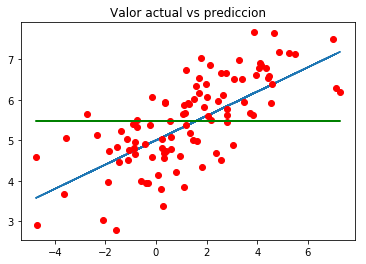

In [233]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean, "g")
plt.title("Valor actual vs prediccion")

In [234]:
data["SSR"] = (np.mean(y_act) - data["y_pred"])**2
data["SSD"] = (data["y_pred"] - data["y_act"])**2
data["SST"] = (np.mean(y_act) - data["y_act"])**2

In [235]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,1.268168,5.910842,5.380450,0.008802,0.281315,0.190595
1,1.496368,6.015761,5.448910,0.000643,0.321320,0.293212
2,2.012143,6.067753,5.603643,0.016737,0.215399,0.352222
3,-1.898861,3.969907,4.430342,1.089787,0.212000,2.263110
4,0.542464,5.479273,5.162739,0.097052,0.100194,0.000025


In [236]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [237]:
SST

115.09736242433458

In [238]:
SSR + SSD

110.02069928138876

In [239]:
R2 = SSR / SST
R2

0.46577935801395365

(array([ 3.,  4.,  9.,  7., 13., 13., 19., 19.,  7.,  6.]),
 array([-1.74004707, -1.41633245, -1.09261783, -0.76890321, -0.44518859,
        -0.12147397,  0.20224065,  0.52595527,  0.84966989,  1.1733845 ,
         1.49709912]),
 <a list of 10 Patch objects>)

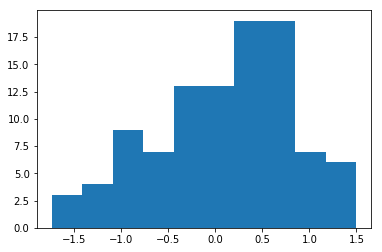

In [240]:
plt.hist(data["y_act"] - data["y_pred"])

## Obteniendo la recta de regresión
* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m^2)
* a = y_m - b*x_m

In [241]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_act"])
x_mean , y_mean

(1.3007347142251207, 5.474270331606599)

In [242]:
# Covarianza
data["beta_n"] = (data["x"]-x_mean)*(data["y_act"]-y_mean)

# Varianza
data["beta_d"] = (data["x"]-x_mean)**2

In [243]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [244]:
alpha = y_mean - beta * x_mean

In [245]:
alpha, beta

(5.060116249749124, 0.3184001144339386)

In [246]:
data["y_model"] = alpha + beta * data["x"]

In [247]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.268168,5.910842,5.380450,0.008802,0.281315,0.190595,-0.014218,0.001061,5.463901
1,1.496368,6.015761,5.448910,0.000643,0.321320,0.293212,0.105934,0.038272,5.536560
2,2.012143,6.067753,5.603643,0.016737,0.215399,0.352222,0.422209,0.506102,5.700783
3,-1.898861,3.969907,4.430342,1.089787,0.212000,2.263110,4.813354,10.237410,4.455519
4,0.542464,5.479273,5.162739,0.097052,0.100194,0.000025,-0.003793,0.574974,5.232837


In [248]:
SSR = sum((np.mean(y_act) - data["y_model"])**2)
SSD = sum((data["y_model"] - data["y_act"])**2)
SST = sum((np.mean(y_act) - data["y_act"])**2)

In [249]:
SSR, SSD, SST

(59.59209140672074, 55.505271017613794, 115.09736242433458)

In [250]:
R2 = SSR / SST
R2

0.5177537534441486

Text(0.5,1,'Valor actual vs prediccion')

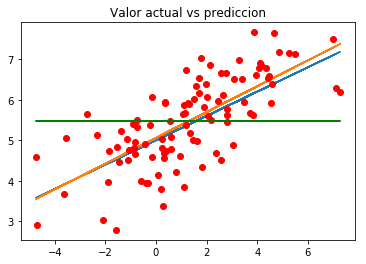

In [252]:
y_mean_line = [np.mean(y_act) for i in range(0, len(x_list))] 
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,data["y_model"])
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean_line, "g")
plt.title("Valor actual vs prediccion")

# Error estandar de los residuos (RSE)

In [255]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7525824317018457

In [258]:
np.mean(data["y_act"])

5.474270331606599

In [259]:
RSE / np.mean(data["y_act"])

0.1374763002398123